In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import os, shutil
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner import HyperModel
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

C:\Users\MY PC\AppData\Local\Temp\ipykernel_5372\1229355946.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [2]:
BASE_DIR = r"C:\Users\MY PC\Documents\beginner_datascience\plantvilagedatset\PlantVillage"

# use your characters list
characters = [
    'Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
    'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato_Bacterial_spot','Tomato_Bacterial_spot','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite',

]

# create train/val/test folders
for split in ["train", "val","test"]:
    split_dir = os.path.join(BASE_DIR, split)
    if not os.path.isdir(split_dir):
        for name in characters:
            os.makedirs(os.path.join(split_dir, name), exist_ok=True)

In [3]:
# Moce the image files
orig_folders = [
    'Pepper__bell___Bacterial_spot/',
    'Pepper__bell___healthy/'
    ,'Potato___Early_blight/',
    'Potato___healthy/',
    'Potato___Late_blight/',
    'Tomato__Target_Spot/',
    'Tomato__Tomato_mosaic_virus/',
    'Tomato__Tomato_YellowLeaf__Curl_Virus/',
    'Tomato_Bacterial_spot/',
    'Tomato_Early_blight',
    'Tomato_healthy/',
    'Tomato_Late_blight/',
    'Tomato_Leaf_Mold/',
    'Tomato_Septoria_leaf_spot/',
    'Tomato_Spider_mites_Two_spotted_spider_mite/',
]


for folder_idx, folder in enumerate(orig_folders):
    folder_path = os.path.join(BASE_DIR, folder)   # path to "0001/", "0002/", etc.
    files = os.listdir(folder_path)

    number_of_images = len(files)
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images * 0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid

    print(folder, number_of_images, n_train, n_valid, n_test)

    for idx, file in enumerate(files):
        file_path = os.path.join(folder_path, file)   # full path to the image

        if idx < n_train:
            dest = os.path.join(BASE_DIR, "train", characters[folder_idx])
        elif idx < n_train + n_valid:
            dest = os.path.join(BASE_DIR, "val", characters[folder_idx])
        else:
            dest = os.path.join(BASE_DIR, "test", characters[folder_idx])

        # create destination folder if missing
        os.makedirs(dest, exist_ok=True)
        shutil.move(file_path, os.path.join(dest, file))


Pepper__bell___Bacterial_spot/ 0 0 0 0
Pepper__bell___healthy/ 0 0 0 0
Potato___Early_blight/ 0 0 0 0
Potato___healthy/ 0 0 0 0
Potato___Late_blight/ 0 0 0 0
Tomato__Target_Spot/ 0 0 0 0
Tomato__Tomato_mosaic_virus/ 0 0 0 0
Tomato__Tomato_YellowLeaf__Curl_Virus/ 0 0 0 0
Tomato_Bacterial_spot/ 0 0 0 0
Tomato_Early_blight 0 0 0 0
Tomato_healthy/ 0 0 0 0
Tomato_Late_blight/ 0 0 0 0
Tomato_Leaf_Mold/ 0 0 0 0
Tomato_Septoria_leaf_spot/ 0 0 0 0
Tomato_Spider_mites_Two_spotted_spider_mite/ 0 0 0 0


In [4]:
from tensorflow.keras.applications import MobileNetV2
mobilenet_model=MobileNetV2(
    input_shape=(224, 224, 3),
    weights="imagenet",
    include_top=False
)

print(type(mobilenet_model))
mobilenet_model.summary()
for layer in mobilenet_model.layers:
    layer.trainable = False
model = models.Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(15, activation="softmax")
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


<class 'keras.src.models.functional.Functional'>


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
import albumentations as A

import albumentations as A

def get_flower_transforms():
    return A.Compose([
        # Random rotation / zoom / shift
        A.ShiftScaleRotate(
            shift_limit=0.1,       # small position shift
            scale_limit=0.2,       # zoom in/out
            rotate_limit=45,       # allow full rotation
            border_mode=1,         # reflect padding
            p=0.8
        ),

        # Random horizontal/vertical flips
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),

        # Brightness & contrast changes (day/night simulation)
        A.RandomBrightnessContrast(
            brightness_limit=0.3,
            contrast_limit=0.3,
            p=0.5
        ),

        # Slight hue & saturation change (flower color variations)
        A.HueSaturationValue(
            hue_shift_limit=15, 
            sat_shift_limit=20, 
            val_shift_limit=20, 
            p=0.4
        ),

        # Blur and noise (simulate camera imperfections)
        A.OneOf([
            A.MotionBlur(p=0.2),
            A.GaussianBlur(p=0.2),
            A.GaussNoise(p=0.2),
        ], p=0.3),

        # Small random cutout (simulate occlusion: leaf covering part of flower)
        A.CoarseDropout(
            max_holes=8,
            max_height=32,
            max_width=32,
            min_holes=2,
            min_height=8,
            min_width=8,
            fill_value=0,
            p=0.3
        ),
    ], p=1.0)


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence

class AlbumentationsFolderGenerator(Sequence):
    def __init__(self, directory, class_names, batch_size, img_size,
                 augmentations=None, preprocess=None, shuffle=True):
        """
        directory: Path to folder (train/val/test)
        class_names: list of class names (order defines class_id)
        batch_size: number of images per batch
        img_size: (H, W) tuple
        augmentations: Albumentations pipeline
        preprocess: Preprocessing function
        shuffle: shuffle each epoch
        """
        self.directory = directory
        self.class_names = class_names
        self.class_to_idx = {cls: idx for idx, cls in enumerate(class_names)}
        self.batch_size = batch_size
        self.img_size = img_size
        self.augment = augmentations
        self.preprocess = preprocess
        self.shuffle = shuffle

        # Gather all image paths and labels
        self.samples = []
        for cls in class_names:
            class_folder = os.path.join(directory, cls)
            for fname in os.listdir(class_folder):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.samples.append((os.path.join(class_folder, fname), self.class_to_idx[cls]))

        self.indices = np.arange(len(self.samples))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.samples) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x, batch_y = [], []

        for i in batch_indices:
            img_path, label = self.samples[i]

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.img_size)

            if self.augment:
                img = self.augment(image=img)["image"]

            if self.preprocess:
                img = self.preprocess(img)

            batch_x.append(img)
            batch_y.append(label)

        return np.array(batch_x, dtype="float32"), np.array(batch_y, dtype="int32")

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


In [7]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
train_gen = AlbumentationsFolderGenerator(
    directory=os.path.join(BASE_DIR, "train"),
    class_names=characters,
    batch_size=16,
    img_size=(224, 224),
    augmentations=get_flower_transforms(),
    preprocess=preprocess_input,
    shuffle=False
)

val_gen = AlbumentationsFolderGenerator(
    directory=os.path.join(BASE_DIR, "val"),
    class_names=characters,
    batch_size=16,
    img_size=(224, 224),
    preprocess=preprocess_input,
    shuffle=False
)
test_gen = AlbumentationsFolderGenerator(
    directory=os.path.join(BASE_DIR, "test"),
    class_names=characters,
    batch_size=16,
    img_size=(224, 224),
    preprocess=preprocess_input,
    shuffle=True
)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\MY PC\AppData\Local\Temp\ipykernel_5372\2324873884.py:43: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


In [8]:
epochs = 50

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=3
)

history=model.fit(train_gen, validation_data=val_gen,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
892/892 - 425s - 477ms/step - accuracy: 0.4493 - loss: 1.7618 - val_accuracy: 0.7245 - val_loss: 0.8604
Epoch 2/50
892/892 - 540s - 605ms/step - accuracy: 0.5900 - loss: 1.2289 - val_accuracy: 0.7795 - val_loss: 0.6416
Epoch 3/50
892/892 - 418s - 468ms/step - accuracy: 0.6504 - loss: 1.0461 - val_accuracy: 0.7960 - val_loss: 0.5754
Epoch 4/50
892/892 - 337s - 377ms/step - accuracy: 0.6707 - loss: 0.9880 - val_accuracy: 0.8134 - val_loss: 0.5598
Epoch 5/50
892/892 - 378s - 424ms/step - accuracy: 0.6848 - loss: 0.9396 - val_accuracy: 0.8527 - val_loss: 0.4623
Epoch 6/50
892/892 - 300s - 336ms/step - accuracy: 0.7023 - loss: 0.8956 - val_accuracy: 0.8506 - val_loss: 0.4770
Epoch 7/50
892/892 - 396s - 444ms/step - accuracy: 0.7005 - loss: 0.8938 - val_accuracy: 0.8401 - val_loss: 0.4572
Epoch 8/50
892/892 - 402s - 451ms/step - accuracy: 0.7048 - loss: 0.8874 - val_accuracy: 0.8627 - val_loss: 0.4255
Epoch 9/50
892/892 - 337s - 377ms/step - accuracy: 0.7096 - loss: 0.8661 - val_a

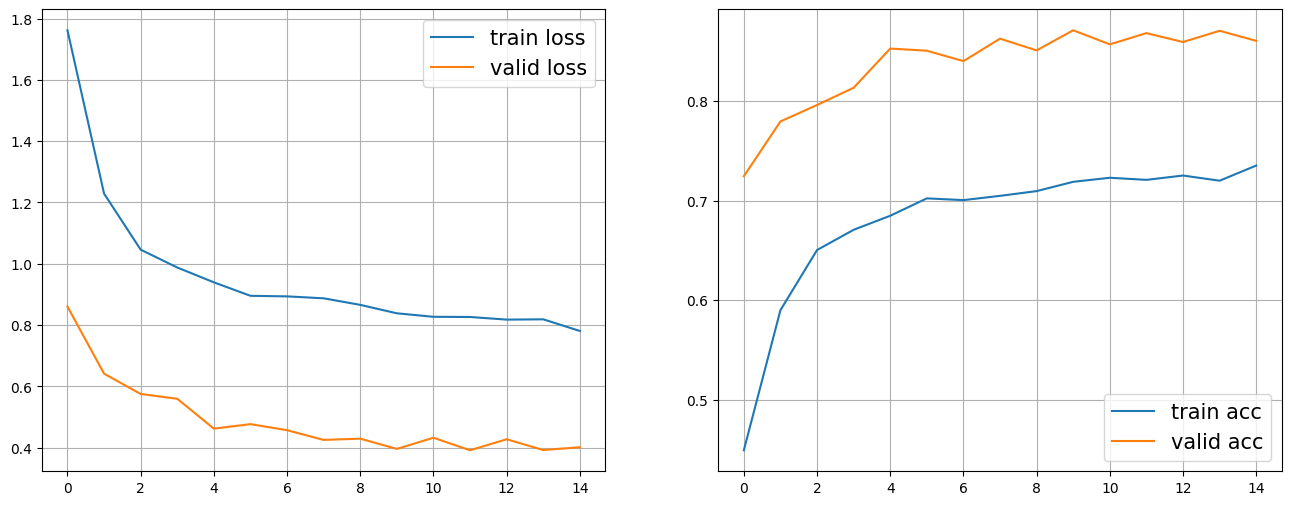

In [9]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [10]:
model.evaluate(test_gen, verbose=2)

223/223 - 134s - 601ms/step - accuracy: 0.8788 - loss: 0.3629


[0.36292898654937744, 0.8787878751754761]

In [11]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Show all rows (optional)
pd.set_option('display.max_rows', None)

# Set column width (optional, useful for very long names)
pd.set_option('display.max_colwidth', None)



# Your list of minifigure names
characters = [
    'Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
    'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato_Bacterial_spot','Tomato_Bacterial_spot','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite',

]




# Collect actual labels
y_true = []
for i in range(len(test_gen)):
    _, batch_y = test_gen[i]   # take labels directly
    y_true.extend(batch_y)

y_true = np.array(y_true)

# Predictions from model
predictions = model.predict(test_gen, verbose=1)
y_pred = np.argmax(predictions, axis=1)
# Construct table
# Map index -> character name
id_to_name = {i: name for i, name in enumerate(characters)}

# Convert IDs to names
y_true_names = [id_to_name[idx] for idx in y_true]
y_pred_names = [id_to_name[idx] for idx in y_pred]

# Build comparison table
import pandas as pd
df_results = pd.DataFrame({
    "true_id": y_true,
    "true_name": y_true_names,
    "pred_id": y_pred,
    "pred_name": y_pred_names
})

print(df_results.head(20))  # show first 20 rows

223/223 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step
    true_id                                    true_name  pred_id  \
0        13                    Tomato_Septoria_leaf_spot       13   
1        13                    Tomato_Septoria_leaf_spot        5   
2        13                    Tomato_Septoria_leaf_spot        9   
3         7        Tomato__Tomato_YellowLeaf__Curl_Virus        7   
4         7        Tomato__Tomato_YellowLeaf__Curl_Virus        7   
5         9                        Tomato_Bacterial_spot        9   
6         5                          Tomato__Target_Spot        9   
7         4                         Potato___Late_blight        4   
8         9                        Tomato_Bacterial_spot        9   
9        14  Tomato_Spider_mites_Two_spotted_spider_mite       14   
10       14  Tomato_Spider_mites_Two_spotted_spider_mite       14   
11        9                        Tomato_Bacterial_spot        9   
12        9                        Tomato_Bacterial_spot   